In [ ]:
# FS wave propagation plots using solution to Helmholtz, 2015-11-23

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [ ]:
# The solution formula is a function of time so I chose time as the horizontal axis of the plot
# A spatial dimension could have been chosen instead but then extra calculations would be 
# required for the plot so its relationship with the solution formula wouldn't be so obvious.

c = 299792458         # Speed of light in a vaccum, m/s.
wavelength = 532e-9   # A nice green is 532 nm.

nu = c/wavelength     # Frequency == oscillation periods per unit time.
omega = 2*np.pi*nu    # Angular frequency == radians per unit time.

threewavetime = 3 * wavelength / c # Time for three waves to pass at speed of light.

samples = 100 # Number of moments in times we want to sample
timelist = np.linspace(0, threewavetime, samples) # A list of times to show on plot

clocklist = timelist # Oh this is such a horrible way to do it! But works it for the animation method.

amplitude = 3.0    # Amplitude of wave
phase = np.pi * 1  # Phase at reference position in space

# Make a phasor

U_p = amplitude * np.e**(1j*phase) 

# Solution of Helmholtz for wave height at various times == wave propagation in phasor notation

def u_p(time):
     return (U_p * np.e**(-1j*omega*time)).real

In [ ]:
# Copied from an animation example on the web. The first one found with a Google search.
# I don't particularly like it but I don't want to spend ages writing a better one.

fig = plt.figure()
ax =  plt.axes(xlim=(-threewavetime,0), ylim=(-amplitude, +amplitude))
ax.set_xlabel('time relative to now')
ax.set_ylabel('amplitude')

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame

def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially

def animate(i):
    waveheight = u_p(clocklist[i]-timelist)
    line.set_data(-timelist, waveheight)                   
    return line,

In [ ]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=samples, interval=20, blit=True, repeat=False)
plt.show()


In [2]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

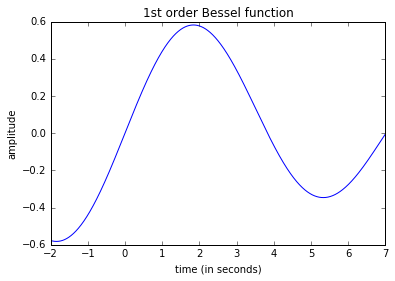

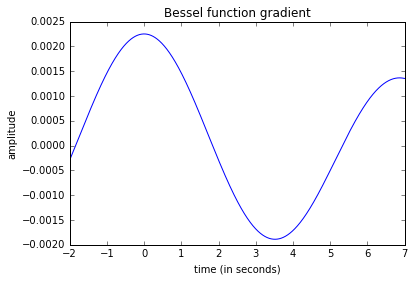

     2
3.6 x - 6 x - 2


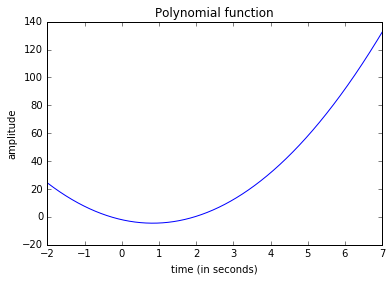

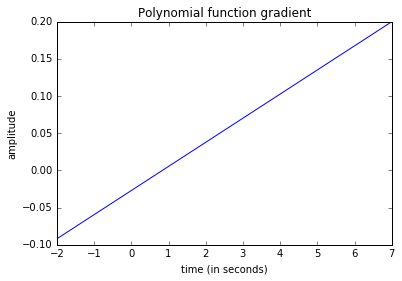

Gradient of 2 order polynomial function is linear function!
   5       4       2
1 x - 1.2 x - 3.6 x - 6 x - 2


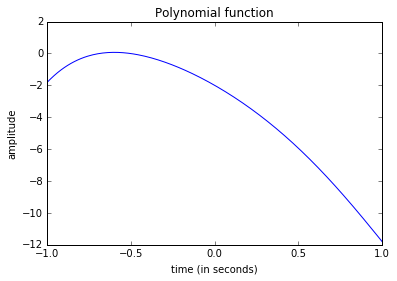

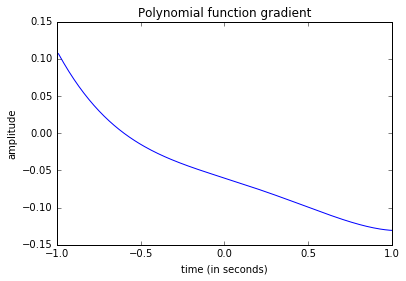

In [3]:
'''
Assignment 4.1 

Make SciPy plots of the gradient of some scalar functions defined by you! You can be inspired by the 
functions and plots from Wikipedia article for Gradient, but don't simply copy them.

'''
%matplotlib inline
import scipy.special as ss
import numpy as np
import scipy.optimize as opt
import matplotlib.pylab as plt
x = np.linspace(-2,7,2000)

# This are one dimensional and are simple derivate

# 1st order Bessel
j1x = ss.j1(x)
gradj1x = np.gradient(j1x)

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='1st order Bessel function')
plt.plot(x, j1x)
plt.show()

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='Bessel function gradient')
plt.plot(x, gradj1x)
plt.show()

#Polynomial function second order
polynomial = np.poly1d([3.6,- 6,-2])
print (polynomial)
polyf = polynomial(x)
gradpolyf= np.gradient(polyf)

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='Polynomial function')
plt.plot(x, polyf )
plt.show()

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='Polynomial function gradient')
plt.plot(x, gradpolyf)
plt.show()

print ('Gradient of 2 order polynomial function is linear function!')

#Polynomial function fifth order order
#Redefine lin space
x = np.linspace(-1,1,200)

polynomial2 = np.poly1d([1,-1.2,0,- 3.6,-6,-2])
print (polynomial2)
polyf2 = polynomial2(x)
gradpolyf2= np.gradient(polyf2)

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='Polynomial function')
plt.plot(x, polyf2 )
plt.show()

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='Polynomial function gradient')
plt.plot(x, gradpolyf2)
plt.show()


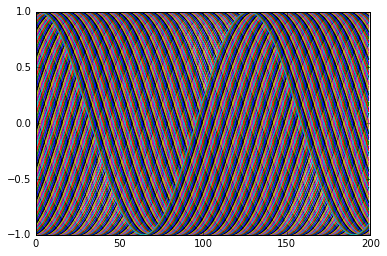

In [8]:
'''
This part is focused on 2D gradient functions.

Assignment 4.2

Make a SciPy plot simulating the propagation of an electromagnetic wave through a vacuum. You can be inspired by
code above, but don't copy it.
'''

def f(x,y):
    return np.sin((x + y))
x = y = np.arange(-5, 5, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([f(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

gx,gy = np.gradient(Z,0.05,0.05)

plt.plot(gy)

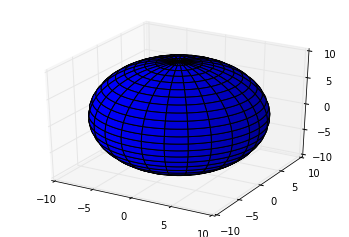

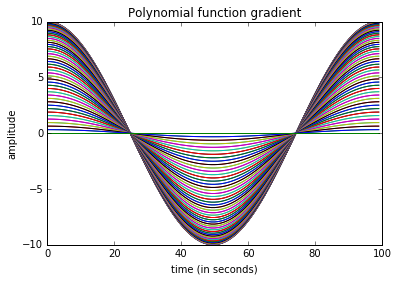

[[  0.00000000e+00   3.17279335e-01   6.34239197e-01 ...,   6.34239197e-01
    3.17279335e-01   1.22464680e-15]
 [  0.00000000e+00   3.16640549e-01   6.32962268e-01 ...,   6.32962268e-01
    3.16640549e-01   1.22218119e-15]
 [  0.00000000e+00   3.14726763e-01   6.29136624e-01 ...,   6.29136624e-01
    3.14726763e-01   1.21479429e-15]
 ..., 
 [  0.00000000e+00   3.14726763e-01   6.29136624e-01 ...,   6.29136624e-01
    3.14726763e-01   1.21479429e-15]
 [  0.00000000e+00   3.16640549e-01   6.32962268e-01 ...,   6.32962268e-01
    3.16640549e-01   1.22218119e-15]
 [  0.00000000e+00   3.17279335e-01   6.34239197e-01 ...,   6.34239197e-01
    3.17279335e-01   1.22464680e-15]]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.01230991e-02   4.02259358e-02 ...,   4.02259358e-02
    2.01230991e-02   7.76719002e-17]
 [  0.00000000e+00   4.01651695e-02   8.02898960e-02 ...,   8.02898960e-02
    4.01651695e-02   

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, rstride=4, cstride=4, color='b')

plt.show()


setup_graph(x_label='time (in seconds)', y_label='amplitude', title='Polynomial function gradient')
plt.plot(x)
plt.show()

print(x)

print(y)

print(z)